In [1]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import gdsfactory as gf
import sax
import gplugins.sax as gs
import lnoi400

2025-05-22 16:17:05.017 | INFO     | kfactory.kcell:show:3722 - klive v0.3.3: Opened file '/var/folders/w7/98hjr7ld1x9_n4fyh1c7bdf00000gn/T/3142891857.gds'
2025-05-22 16:17:31.851 | INFO     | kfactory.kcell:show:3722 - klive v0.3.3: Opened file '/var/folders/w7/98hjr7ld1x9_n4fyh1c7bdf00000gn/T/109025115.gds'
2025-05-22 16:17:34.701 | INFO     | kfactory.kcell:show:3722 - klive v0.3.3: Opened file '/var/folders/w7/98hjr7ld1x9_n4fyh1c7bdf00000gn/T/503033798.gds'
2025-05-22 16:17:42.901 | INFO     | kfactory.kcell:show:3722 - klive v0.3.3: Opened file '/var/folders/w7/98hjr7ld1x9_n4fyh1c7bdf00000gn/T/3142891857.gds'
2025-05-22 16:21:43.634 | INFO     | kfactory.kcell:show:3722 - klive v0.3.3: Opened file '/var/folders/w7/98hjr7ld1x9_n4fyh1c7bdf00000gn/T/1198045976.gds'
2025-05-22 16:21:49.058 | INFO     | kfactory.kcell:show:3722 - klive v0.3.3: Opened file '/var/folders/w7/98hjr7ld1x9_n4fyh1c7bdf00000gn/T/1789562632.gds'
2025-05-22 16:21:58.685 | INFO     | kfactory.kcell:show:3728 - kl

In [8]:
from functools import partial

import gdsfactory as gf
import numpy as np
from gdsfactory.routing import route_quad
from gdsfactory.typings import ComponentSpec, CrossSectionSpec

from lnoi400.spline import (
    bend_S_spline,
    bend_S_spline_varying_width,
    spline_clamped_path,
)
from lnoi400.tech import LAYER, xs_uni_cpw

@gf.cell
def U_bend_racetrack_varang(
    angle: float = 180.0,
    v_offset: float = 90.0,
    p: float = 1.0,
    with_arc_floorplan: bool = True,
    cross_section: CrossSectionSpec = "xs_rwg3000",
    **kwargs,
) -> gf.Component:
    """A U-bend with fixed cross-section and dimensions, suitable for building a low-loss racetrack resonator."""

    radius = 0.5 * v_offset

    npoints = int(np.round(600 * radius / 90.0))
    #angle = 180.0

    return gf.components.bend_euler(
        radius=radius,
        angle=angle,
        p=p,
        with_arc_floorplan=with_arc_floorplan,
        npoints=npoints,
        cross_section=cross_section,
        **kwargs,
    )

["Port(self.name='o1', self.width=1000, trans=r180 *1 0,0, layer=LN_RIDGE (2/0), port_type=optical)", "Port(self.name='o2', self.width=1000, trans=r45 *1 31.82,13.18, layer=LN_RIDGE (2/0), port_type=optical)"]


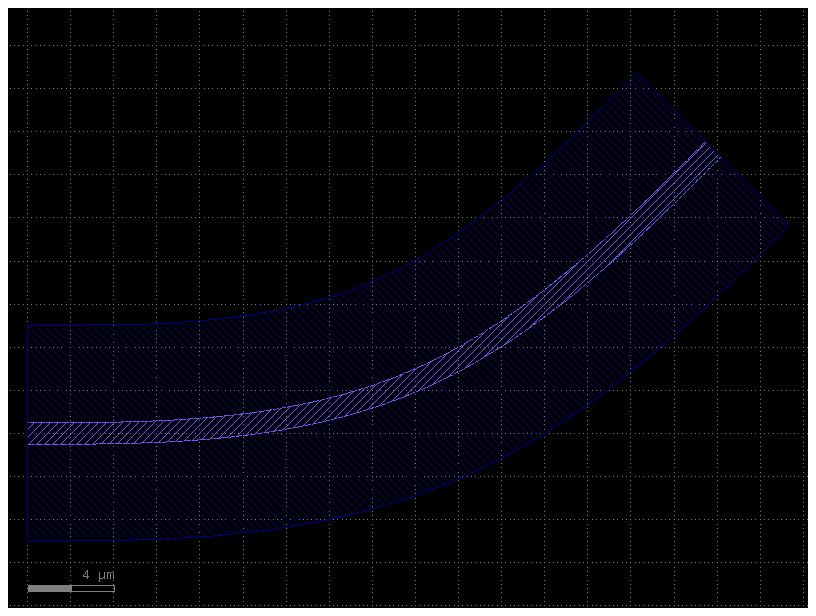

In [ ]:
miang = 45.0
rtD = 200.0

c1 = U_bend_racetrack_varang(angle=miang,v_offset=rtD, p=1.0, with_arc_floorplan=True, cross_section='xs_rwg1000')
c2 = U_bend_racetrack_varang(angle=miang/2.0,v_offset=rtD, p=1.0, with_arc_floorplan=True, cross_section='xs_rwg1000')
#c.plot()
#c.show()
#print(c.ports)